## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "Mouse_data.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results,how = 'left',on = 'Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(Duplicated_mice)

['g989']


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(Duplicated_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].nunique()
print(total_mice)

248


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_df.groupby('Drug Regimen')
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_avg = regimen_group["Tumor Volume (mm3)"].mean()
regimen_med = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_std = regimen_group['Tumor Volume (mm3)'].std()
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Sum_stats = pd.DataFrame({'Mean':regimen_avg,'Median':regimen_med,'Variance':regimen_var,'Standard Deviation':regimen_std,'SEM':regimen_sem})
# This method produces everything in a single groupby function
Sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

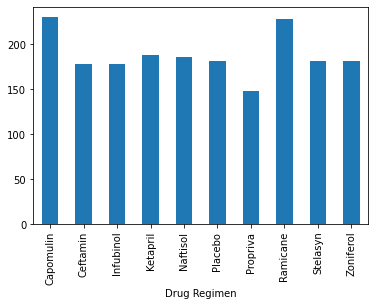

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Mouse_count = regimen_group['Mouse ID'].count()
Mouse_count.plot(kind="bar")

([<matplotlib.axis.XTick at 0x2dabc2173d0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

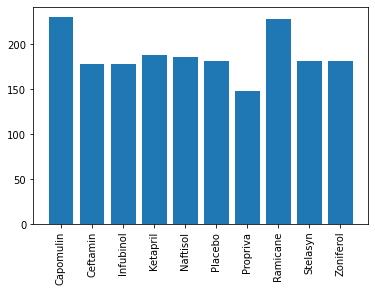

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_regimens = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
Mouse_counts_list = Mouse_count.to_list()
x_axis = np.arange(len(Mouse_counts_list)) 
plt.bar(x_axis,Mouse_counts_list)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_regimens,rotation='vertical')

        total       perc
Sex                     
Female    123  49.596774
Male      125  50.403226


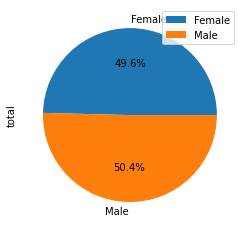

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender_group.size())
mouse_proportions = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_proportions.columns = ['total']
sums = mouse_proportions.sum()
mouse_proportions['perc'] = (mouse_proportions['total']/(total_mice))*100
print(mouse_proportions)

plot = mouse_proportions.plot.pie(y='total',autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x2dabc2f4b20>,
 [Text(0.013934097579311265, 1.0999117423341975, 'female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

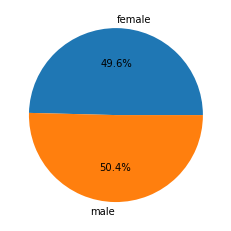

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = [123 ,125]
labels = ['female','male']

plt.pie(counts,labels=labels,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
temp_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | (clean_df["Drug Regimen"] == "Infubinol")|(clean_df["Drug Regimen"] == "Ceftamin")]
temp_df
# Start by getting the last (greatest) timepoint for each mouse
final_values_df = temp_df.groupby('Mouse ID').max()['Timepoint']
final_values_df = pd.DataFrame(final_values_df)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_final_values = pd.merge(final_values_df,clean_df,on=("Mouse ID","Timepoint"),how='left')
merged_final_values

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [59]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Time')

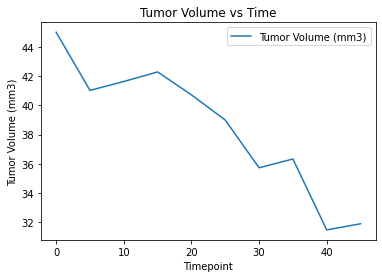

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse id = y793, weight for all time points
line_plot = clean_df[clean_df["Mouse ID"] == 'y793']
line_plot.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time')

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capol_df = clean_df[clean_df["Drug Regimen"] == 'Capomulin']
tumor_group = Capol_df.groupby('Timepoint')
print(tumor_group.head())
average_tumor = tumor_group['Tumor Volume (mm3)'].mean()
average_tumor
Capol_df.plot(x='Weight (g)', y='mean_tumor', style='o')
#plt.ylabel('Tumor Volume (mm3)')
#plt.title('Weight vs Tumor Volume')

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10      s185    Capomulin  Female           3          17          0   
11      s185    Capomulin  Female           3          17          5   
12      s185    Capomulin  Female           3          17         10   
13      s185    Capomulin  Female           3          17         15   
14      s185    Capomulin  Female           3          17         20   
15      s185    Capomulin  Female           3          17         25   
16      s185    Capomulin  Female           3          17         30   
17      s185    Capomulin  Female           3          17         35   
18      s185    Capomulin  Female           3          17         40   
19      s185    Capomulin  Female           3          17         45   
20      x401    Capomulin  Female          16          15          0   
21      x401    Capomulin  Female          16          15          5   
22      x401    Capomulin  Female          16          15       

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Tumor Volume (mm3), dtype: float64

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen